In [ ]:
!pip install miceforest --no-cache-dir
import miceforest as mf



import pandas as pd

# Read your dataset into a pandas DataFrame
df = pd.read_csv('dataset_2_copy.csv')


object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    df[col] = pd.Categorical(df[col])

# Create kernel.
kds = mf.ImputationKernel(
    df,
    save_all_iterations=True,
    random_state=100
)

# Run the MICE algorithm for 2 iterations
kds.mice(2)

# Return the completed dataset.
df_imputed = kds.complete_data()

# View original data with missing values.
df.head()

# View Imputed dataset
df_imputed.head()

# Run the MICE algorithm for 5 iterations with 50 trees in LightGBM
kds.mice(iterations=5, n_estimators=50)

# Now, let's predict.
df_imputed2 = kds.complete_data()
df_imputed2.head()

# Let's compare the actual value by loading the original data that does not contain the missing values.




,Athlete,RHR,HRV,Recovery,Sleep.Score,Hours.in.Bed,Hours.of.Sleep,Sleep.Need,Sleep.Efficiency....,Wake.Periods,...,Number.of.accelerations…0.99....0.50.m.s².,Number.of.accelerations..0.50…0.99.m.s².,Number.of.accelerations..1.00…1.99.m.s².,Number.of.accelerations..2.00…2.99.m.s².,Number.of.accelerations..3.00…50.00.m.s².,Calories..kcal.,Training.load.score,Cardio.load,Recovery.time..h.,Game.Score
0,1,51.0,129.0,73.0,100.0,9.81,9.05,9.06,92.0,12.0,...,217.0,244.0,238.0,65.0,0.0,811.0,118.0,141.0,10.5,5.0
1,10,58.0,100.0,50.0,49.0,4.01,3.83,8.42,93.0,7.0,...,1431.0,196.0,241.0,67.0,3.0,433.0,46.0,171.0,523.0,0.8
2,11,65.0,120.0,71.0,94.0,8.62,7.82,8.32,91.0,16.0,...,150.0,186.0,212.0,50.0,0.0,834.0,139.0,152.0,22.1,2.0
3,12,52.0,107.0,83.0,85.0,8.14,7.22,8.46,89.0,11.0,...,171.0,165.0,218.0,50.0,0.0,569.0,83.0,86.0,0.0,2.9
4,13,53.0,51.0,76.0,76.0,8.86,6.99,9.25,79.0,27.0,...,183.0,214.0,299.0,62.0,0.0,869.0,131.0,161.0,19.5,4.4


In [ ]:
df_imputed.to_csv('imputed_data.csv', index=False)

In [ ]:
from google.colab import files
files.download('imputed_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ls

dataset_1_copy.csv  drive/  imputed_data.csv  sample_data/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

additonal code

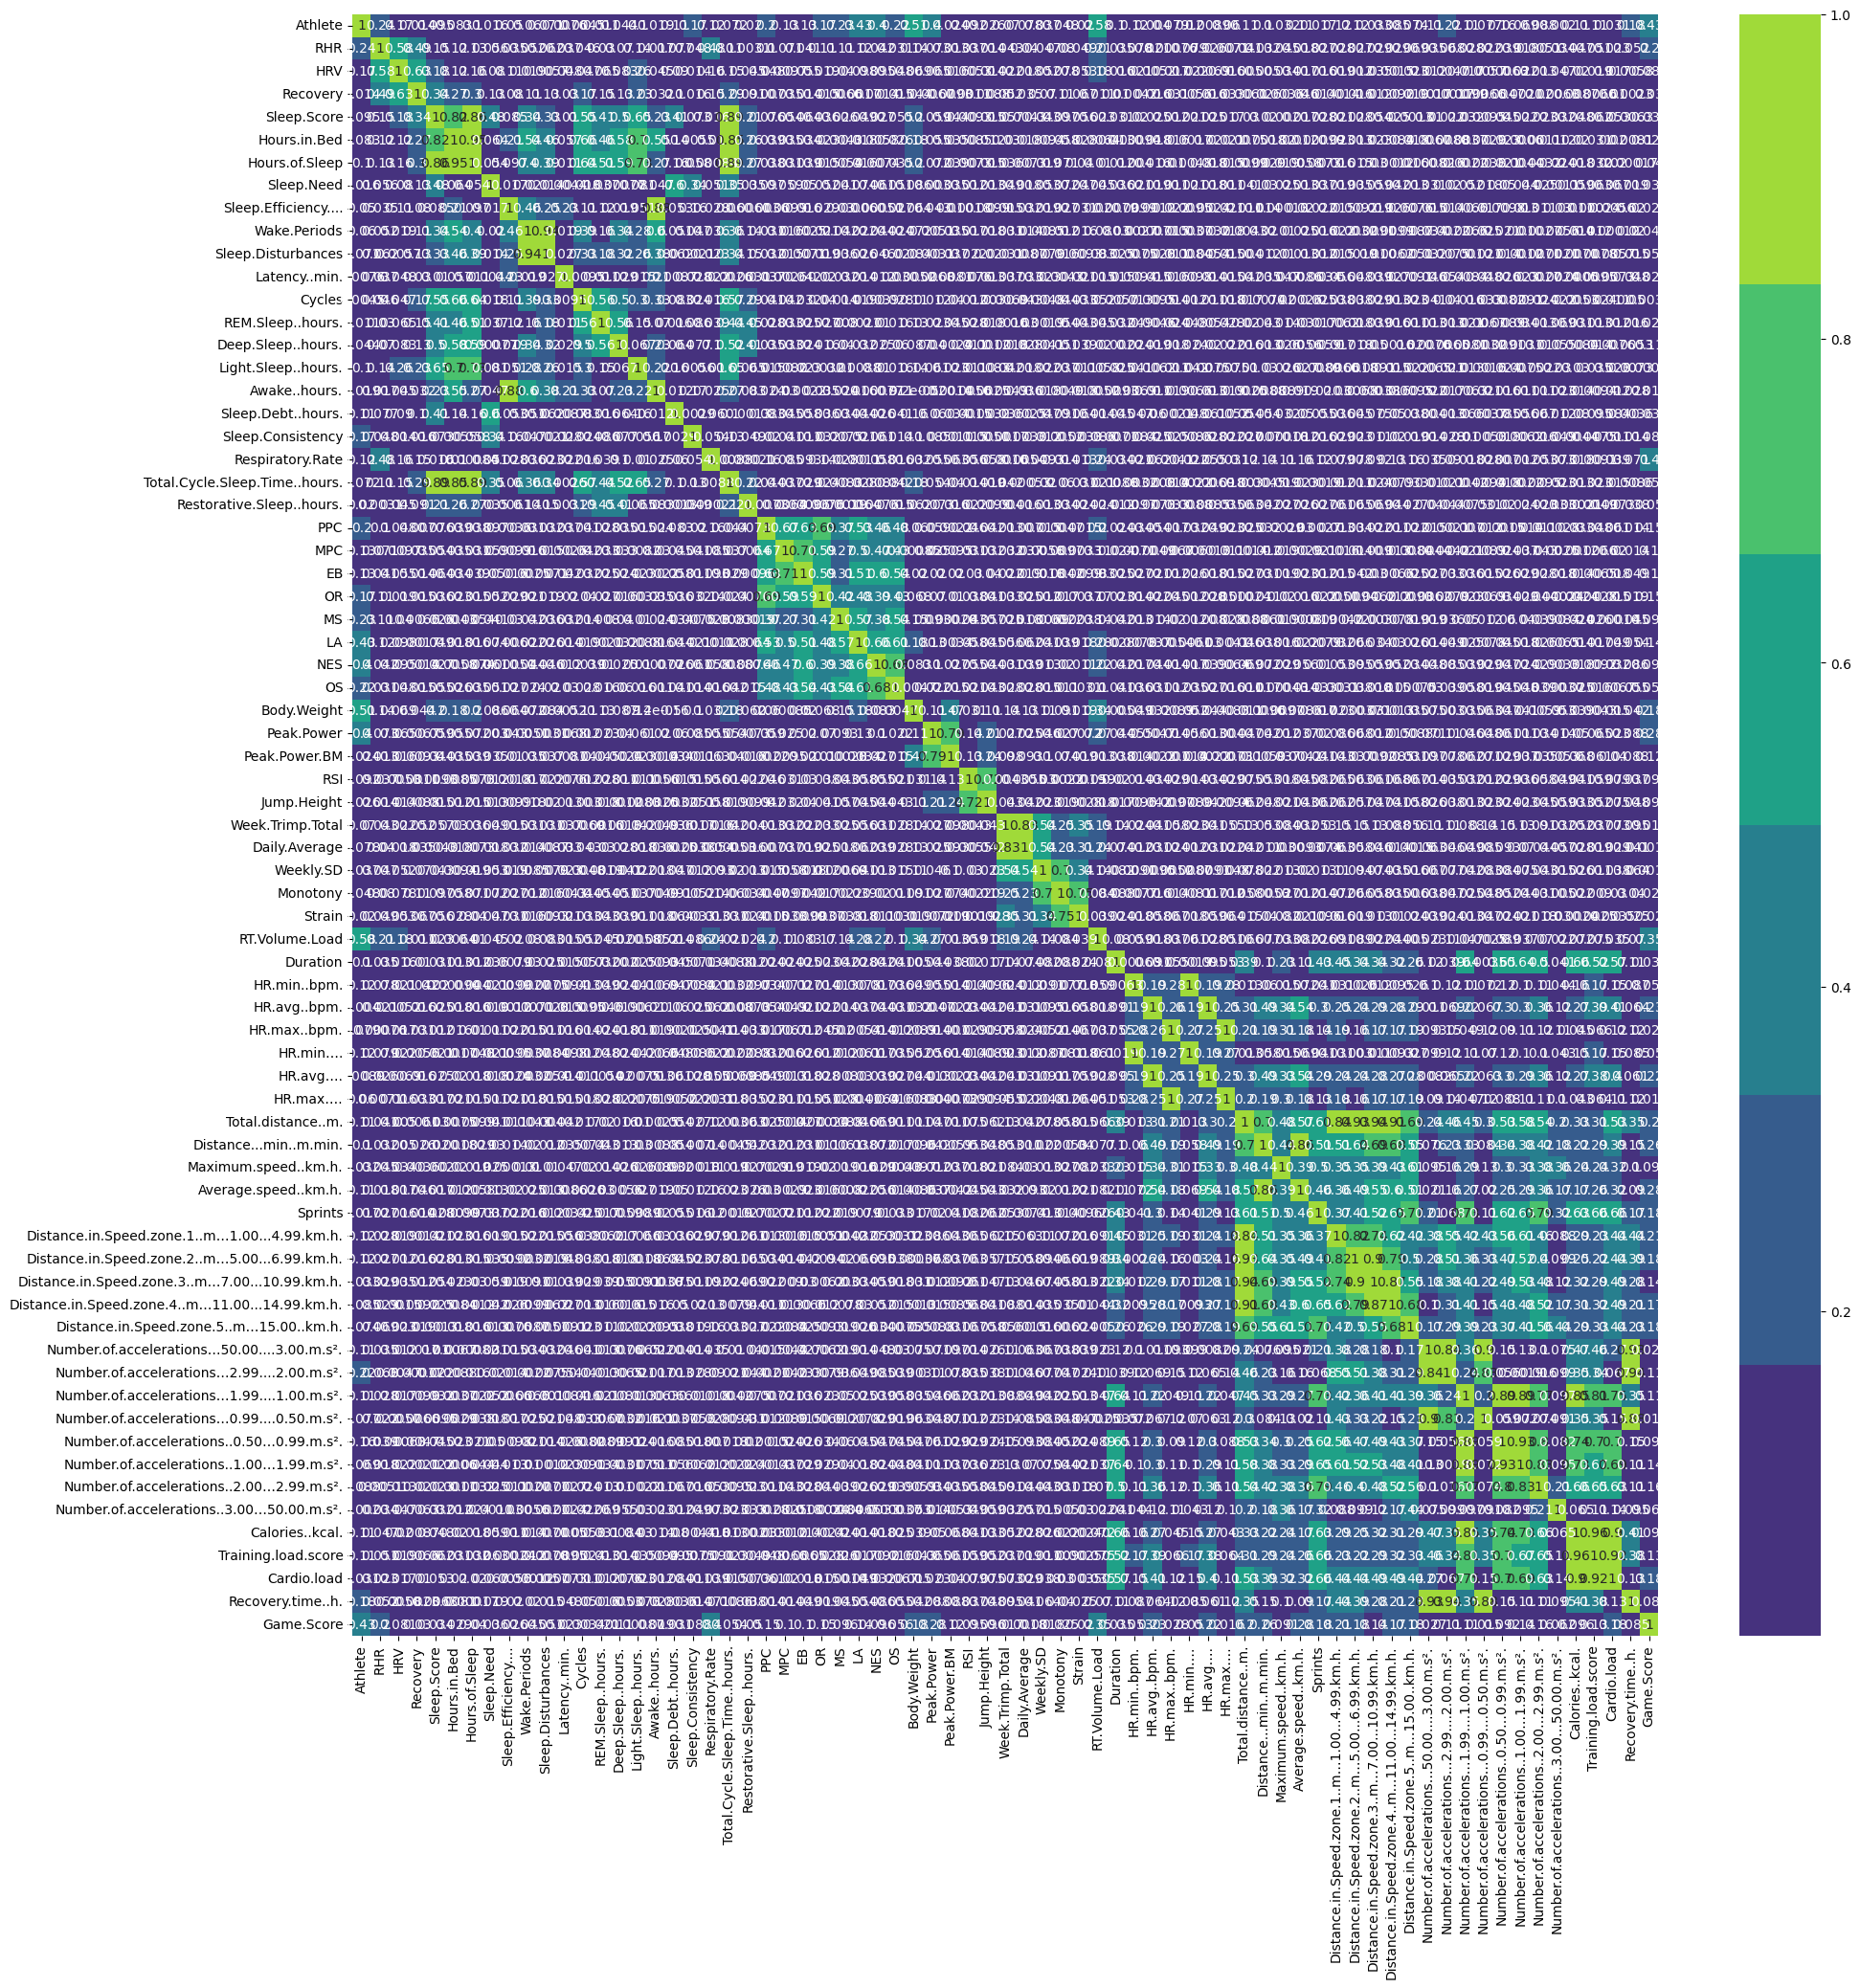

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Create a correlation matrix for the imputed dataset
correlation_matrix = df_imputed.corr().abs()

# Set up the figure
plt.figure(figsize=(22, 22))

# Set color palette
custom_palette = sns.color_palette("viridis")

# Plotting correlation heatmap
heatmap = sns.heatmap(correlation_matrix, cmap=custom_palette, annot=True)

# Display heatmap
plt.show()


In [ ]:
correlation_matrix.to_csv("correlation_matrixold.csv")

In [ ]:
from google.colab import files

# Download the CSV file
files.download("correlation_matrixold.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Assuming df is your DataFrame with 100 features
# Compute the correlation matrix
df_imputed = pd.read_csv('imputed_data.csv')
correlation_matrix = df_imputed.corr()

# Convert the correlation matrix into a more concise format
# Here, we're just printing the correlation coefficients above a certain threshold (e.g., 0.5)
threshold = 0.68
high_correlation = (correlation_matrix > threshold) | (correlation_matrix < -threshold)
high_correlation = high_correlation.unstack().reset_index()
high_correlation = high_correlation[high_correlation[0]]
high_correlation.columns = ['Feature 1', 'Feature 2', 'Correlation']
print(high_correlation)

# Create an empty list to store pairs of highly correlated features
high_correlation_list = []

# Iterate through the DataFrame and append pairs of highly correlated features
for index, row in high_correlation.iterrows():
    feature1 = row['Feature 1']
    feature2 = row['Feature 2']
    high_correlation_list.append([feature1, feature2])

# Print the list of lists
print(high_correlation_list)



              Feature 1                                    Feature 2  \
0               Athlete                                      Athlete   
72                  RHR                                          RHR   
144                 HRV                                          HRV   
216            Recovery                                     Recovery   
288         Sleep.Score                                  Sleep.Score   
...                 ...                                          ...   
4957  Recovery.time..h.  Number.of.accelerations…50.00....3.00.m.s².   
4958  Recovery.time..h.   Number.of.accelerations…2.99....2.00.m.s².   
4960  Recovery.time..h.   Number.of.accelerations…0.99....0.50.m.s².   
4968  Recovery.time..h.                            Recovery.time..h.   
5040         Game.Score                                   Game.Score   

      Correlation  
0            True  
72           True  
144          True  
216          True  
288          True  
...           .

In [ ]:
# Save the DataFrame to a CSV file
high_correlation.to_csv('high_correlation.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('high_correlation.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Assuming you have a correlation matrix stored in the DataFrame 'correlation_matrix'
# For demonstration purposes, let's create a sample correlation matrix
# correlation_matrix = your_actual_correlation_matrix_data_here

# Sample correlation matrix
correlation_matrix = pd.DataFrame({
    'Feature1': [1.0, 0.8, -0.3],
    'Feature2': [0.8, 1.0, -0.5],
    'Feature3': [-0.3, -0.5, 1.0]
})

# Function to extract high correlations and summarize them
def summarize_correlations(correlation_matrix, threshold=0.7):
    high_correlations = []

    # Iterate through each pair of features in the correlation matrix
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            correlation_coefficient = correlation_matrix.iloc[i, j]

            # Check if the correlation coefficient exceeds the threshold
            if abs(correlation_coefficient) >= threshold:
                # Store the high correlation information
                high_correlations.append((feature1, feature2, correlation_coefficient))

    return high_correlations

# Summarize high correlations
high_correlations = summarize_correlations(correlation_matrix, threshold=0.7)

# Print the summarized high correlations
for feature1, feature2, correlation_coefficient in high_correlations:
    print(f"High correlation between {feature1} and {feature2}: {correlation_coefficient}")


High correlation between Feature1 and Feature2: 0.8


Data Balancing code and analysis

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load the saved imputed data
df_imputed = pd.read_csv('imputed_data.csv')

In [ ]:

# Binarize the target variable based on a certain threshold (e.g., median)
threshold = df_imputed['Game.Score'].median()
df_imputed['Game.Score'] = np.where(df_imputed['Game.Score'] >= threshold, 1, 0)

# Separate features and target
X = df_imputed.drop('Game.Score', axis=1)
Y = df_imputed['Game.Score']
# Define model without imbalance handling
model_ori = AdaBoostClassifier()

# Define evaluation procedure for classification model without imbalance handling
cv_ori = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate classification model without imbalance handling
scores_ori = cross_validate(model_ori, X, Y, scoring=scoring, cv=cv_ori, n_jobs=-1)

# Summarize performance without imbalance handling
print('\nClassification Model without Imbalance Handling:')
print('Mean Accuracy:', np.mean(scores_ori['test_accuracy']))
print('Mean Precision:', np.mean(scores_ori['test_precision_macro']))
print('Mean Recall:', np.mean(scores_ori['test_recall_macro']))





Classification Model without Imbalance Handling:
Mean Accuracy: 0.7916949522212682
Mean Precision: 0.7920544891614827
Mean Recall: 0.7917245124476804


In [ ]:
# Define the SMOTE-ENN resampling technique
resample = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))

# Define the pipeline with SMOTE-ENN and a classification model
pipeline = Pipeline(steps=[('r', resample), ('m', AdaBoostClassifier())])

# Define evaluation procedure for classification model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define scoring metrics
scoring = ['accuracy', 'precision_macro', 'recall_macro']

# Evaluate classification model with SMOTE-ENN
scores = cross_validate(pipeline, X, Y, scoring=scoring, cv=cv, n_jobs=-1)

# Summarize performance
print('\nClassification Model with SMOTE-ENN:')
print('Mean Accuracy:', np.mean(scores['test_accuracy']))
print('Mean Precision:', np.mean(scores['test_precision_macro']))
print('Mean Recall:', np.mean(scores['test_recall_macro']))

# Create a correlation matrix for the imputed dataset
correlation_matrix = df_imputed.corr().abs()

# Set up the figure
plt.figure(figsize=(22, 22))

# Set color palette
custom_palette = sns.color_palette("viridis")


Classification Model with SMOTE-ENN:
Mean Accuracy: 0.7467171035592088
Mean Precision: 0.7503510738369918
Mean Recall: 0.7476295689198287


<Figure size 2200x2200 with 0 Axes>